# plot figures from processed data

In [1]:
# conda install cartopy for visualization
%conda install -c conda-forge cartopy -y

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
# import libraries
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import netCDF4 as nc
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


cartopy data path: /home/dong1128/.local/share/cartopy


In [11]:
import src.data_utils as du

file_path = '/work/dong1128/database/radar_cropped/2021/202103/20210302/20210302_0000.nc'
d, lon = du.Netcdf4DataLoader(file_path).extract_data('cv', 'lon')
# d = nc.Dataset('/work/dong1128/database/radar_cropped/2021/202103/20210302/20210302_0000.nc')
# print(d.variables.keys())
# data = d['cv']
# lat = d['lat']
# lon = d['lon']

masked_array(
  data=[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [15]:
# get colorbar
def get_colorbar():
    cwbRR = mpl.colors.ListedColormap(['#FFFFFF', '#9CFCFF', '#03C8FF', '#059BFF', '#0363FF',
                                    '#059902', '#39FF03', '#FFFB03', '#FFC800', '#FF9500',
                                    '#FF0000', '#CC0000', '#990000', '#960099', '#C900CC',
                                    '#FB00FF', '#FDC9FF'])
    bounds = [ 0, 1, 2, 5, 10, 15, 20, 30, 40, 50, 70, 90, 110, 130, 150, 200, 300]
    norm = mpl.colors.BoundaryNorm(bounds, cwbRR.N)
    return cwbRR, norm
cmap, norm = get_colorbar()

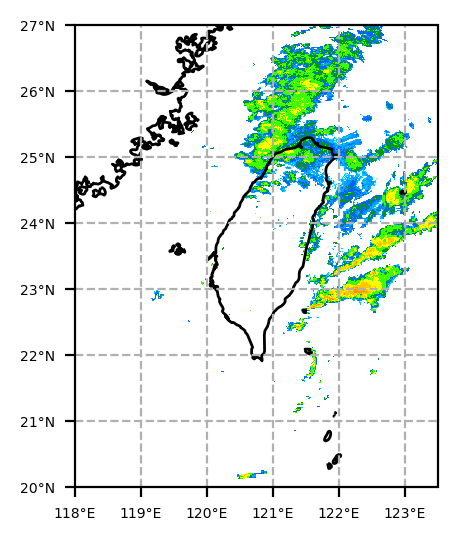

In [16]:
# https://stackoverflow.com/questions/33942233/how-do-i-change-matplotlibs-subplot-projection-of-an-existing-axis
# shows the truth of plt.axes
# another website: https://zhajiman.github.io/post/cartopy_introduction/

fig, geo_axes = plt.subplots(1, 1, figsize=(5, 3), dpi=200, facecolor='w', 
    subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0.)}) 
# feature
# geo_axes.stock_img()
geo_axes.add_feature(cfeature.LAND, edgecolor='black')
geo_axes.add_feature(cfeature.OCEAN.with_scale('10m'))
geo_axes.add_feature(cfeature.COASTLINE.with_scale('10m'),lw=1)
# tick
# geo_axes.set_xticks(np.arange(-180,181,45), crs=ccrs.PlateCarree())
geo_axes.set_xticks(np.arange(118,123.5,1), crs=ccrs.PlateCarree())
# geo_axes.set_yticks(np.arange(-90,90+30,30), crs=ccrs.PlateCarree())
geo_axes.set_yticks(np.arange(20,27+1,1), crs=ccrs.PlateCarree())
geo_axes.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
geo_axes.yaxis.set_major_formatter(LatitudeFormatter())
geo_axes.tick_params(axis='both', which='major', labelsize=5)
# range
geo_axes.set_extent([118, 123.5, 20, 27], crs=ccrs.PlateCarree())
# data
geo_axes.pcolormesh(lon, lat, data, edgecolors='none', shading='auto', norm=norm, cmap=cmap)
# gridline
geo_axes.gridlines(xlocs=np.arange(118,123.5,1), ylocs=np.arange(20,27+1,1), 
    draw_labels=False, linestyle='--')